量化分析师的Python日记【第7天：Q Quant 之初出江湖】

In [2]:
# 参数
spot = 2.45
strike = 2.50
maturity = 0.25
r = 0.05
vol = 0.25

In [3]:
# 基于Black - Scholes 公式的期权定价公式
from math import log, sqrt, exp
from scipy.stats import norm

def call_option_pricer(spot, strike, maturity, r, vol):

    d1 = (log(spot/strike) + (r + 0.5 * vol *vol) * maturity) / vol / sqrt(maturity)
    d2 = d1 - vol * sqrt(maturity)

    price = spot * norm.cdf(d1) - strike * exp(-r*maturity) * norm.cdf(d2)
    return price

In [4]:
print ('期权价格 : %.4f' % call_option_pricer(spot, strike, maturity, r, vol))


期权价格 : 0.1133


In [5]:
import time
import numpy as np

portfolioSize = range(1, 10000, 500)
timeSpent = []

for size in portfolioSize:
    now = time.time()
    strikes = np.linspace(2.0,3.0,size)
    for i in range(size):
        res = call_option_pricer(spot, strikes[i], maturity, r, vol)
    timeSpent.append(time.time() - now)

NameError: name 'font' is not defined

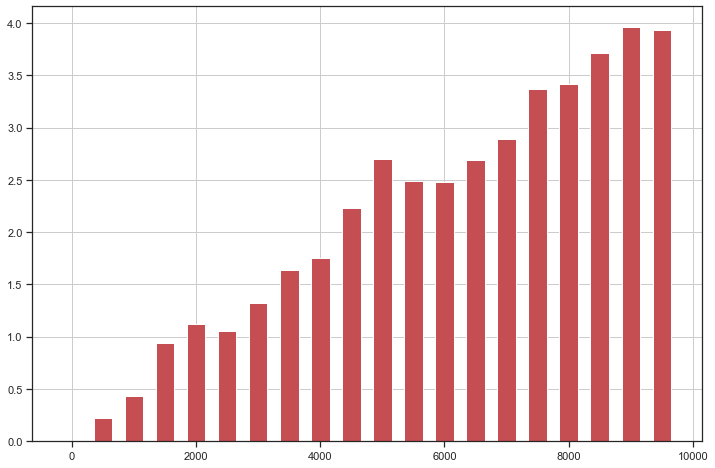

In [8]:
from matplotlib import pylab
import seaborn as sns
#font.set_size(15)
sns.set(style="ticks")
pylab.figure(figsize = (12,8))
pylab.bar(portfolioSize, timeSpent, color = 'r', width =300)
pylab.grid(True)
pylab.title(u'期权计算时间耗时（单位：秒）', fontproperties = font, fontsize = 18)
pylab.ylabel(u'时间（s)', fontproperties = font, fontsize = 15)
pylab.xlabel(u'组合数量', fontproperties = font, fontsize = 15)


In [10]:
sample = np.linspace(1.0,100.0,5)
np.exp(sample)

array([2.71828183e+00, 1.52434373e+11, 8.54813429e+21, 4.79357761e+32,
       2.68811714e+43])

In [11]:
# 使用numpy的向量函数重写Black - Scholes公式
def call_option_pricer_nunmpy(spot, strike, maturity, r, vol):

    d1 = (np.log(spot/strike) + (r + 0.5 * vol *vol) * maturity) / vol / np.sqrt(maturity)
    d2 = d1 - vol * np.sqrt(maturity)

    price = spot * norm.cdf(d1) - strike * np.exp(-r*maturity) * norm.cdf(d2)
    return price

In [12]:
timeSpentNumpy = []
for size in portfolioSize:
    now = time.time()
    strikes = np.linspace(2.0,3.0, size)
    res = call_option_pricer_nunmpy(spot, strikes, maturity, r, vol)
    timeSpentNumpy.append(time.time() - now)

NameError: name 'font' is not defined

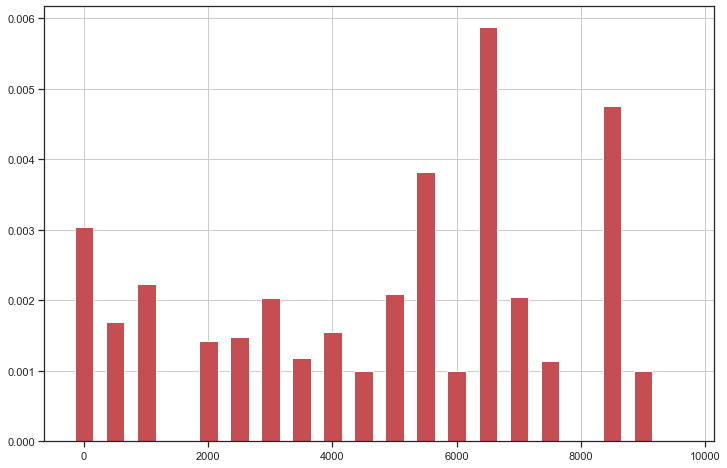

In [13]:
pylab.figure(figsize = (12,8))
pylab.bar(portfolioSize, timeSpentNumpy, color = 'r', width = 300)
pylab.grid(True)
pylab.title(u'期权计算时间耗时（单位：秒）- numpy加速版', fontproperties = font, fontsize = 18)
pylab.ylabel(u'时间（s)', fontproperties = font, fontsize = 15)
pylab.xlabel(u'组合数量', fontproperties = font, fontsize = 15)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: name 'font' is not defined

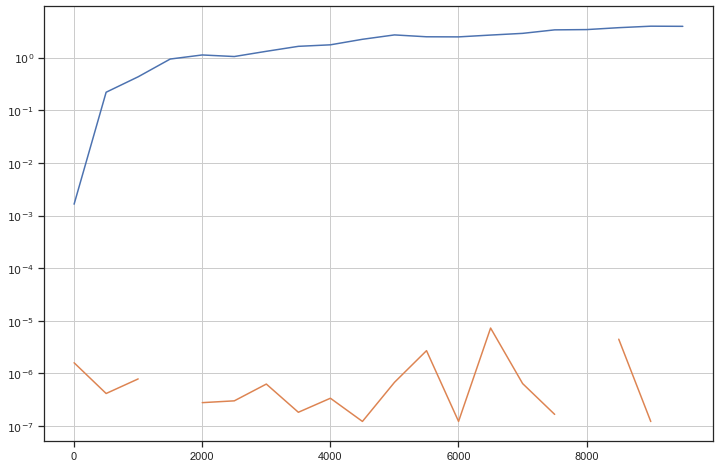

In [14]:
fig = pylab.figure(figsize = (12,8))
ax = fig.gca()
pylab.plot(portfolioSize, np.log10(timeSpent), portfolioSize, np.log(timeSpentNumpy))
pylab.grid(True)
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '$10^{%.0f}$' % (x)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
pylab.title(u'期权计算时间耗时（单位：秒）', fontproperties = font, fontsize = 18)
pylab.legend([u'循环计算', u'numpy向量加速'], prop = font, loc = 'upper center', ncol = 2)
pylab.ylabel(u'时间（秒)', fontproperties = font, fontsize = 15)
pylab.xlabel(u'组合数量', fontproperties = font, fontsize = 15)

3. 使用scipy做仿真计算
期权价格的计算方法中有一类称为 蒙特卡洛 方法。

In [18]:
import scipy
scipy.random.randn(10)


array([ 0.2486519 ,  0.91687353, -0.11506855,  0.36510251, -1.80683666,
        1.64365663, -0.47911323, -0.30002248, -2.22346323, -0.68927605])

均  值：0.0128
标准差：0.9827


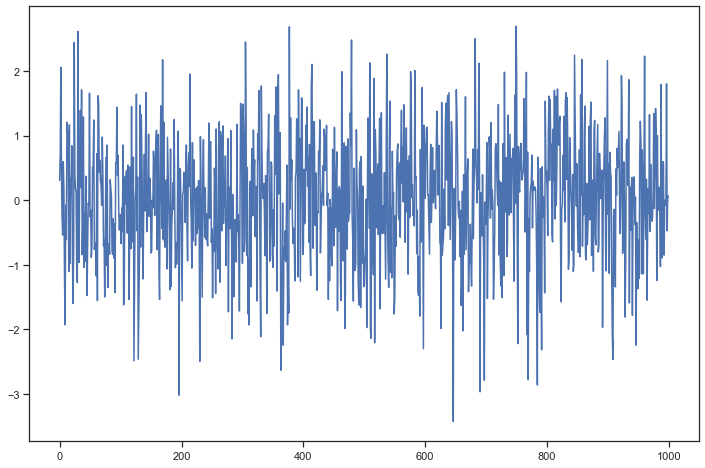

In [19]:
pylab.figure(figsize = (12,8))
randomSeries = scipy.random.randn(1000)
pylab.plot(randomSeries)
print (u'均  值：%.4f' % randomSeries.mean())
print (u'标准差：%.4f' % randomSeries.std())

In [20]:
def call_option_pricer_monte_carlo(spot, strike, maturity, r, vol, numOfPath = 5000):
    randomSeries = scipy.random.randn(numOfPath)
    s_t = spot * np.exp((r - 0.5 * vol * vol) * maturity + randomSeries * vol * sqrt(maturity))
    sumValue = np.maximum(s_t - strike, 0.0).sum()
    price = exp(-r*maturity) * sumValue / numOfPath
    return price

In [21]:
print( '期权价格（蒙特卡洛） : %.4f' % call_option_pricer_monte_carlo(spot, strike, maturity, r, vol))

期权价格（蒙特卡洛） : 0.1156


In [22]:
pathScenario = range(1000, 50000, 1000)
numberOfTrials = 100

confidenceIntervalUpper = []
confidenceIntervalLower = []
means = []

for scenario in pathScenario:
    res = np.zeros(numberOfTrials)
    for i in range(numberOfTrials):
        res[i] = call_option_pricer_monte_carlo(spot, strike, maturity, r, vol, numOfPath = scenario)
    means.append(res.mean())
    confidenceIntervalUpper.append(res.mean() + 1.96*res.std())
    confidenceIntervalLower.append(res.mean() - 1.96*res.std())

NameError: name 'font' is not defined

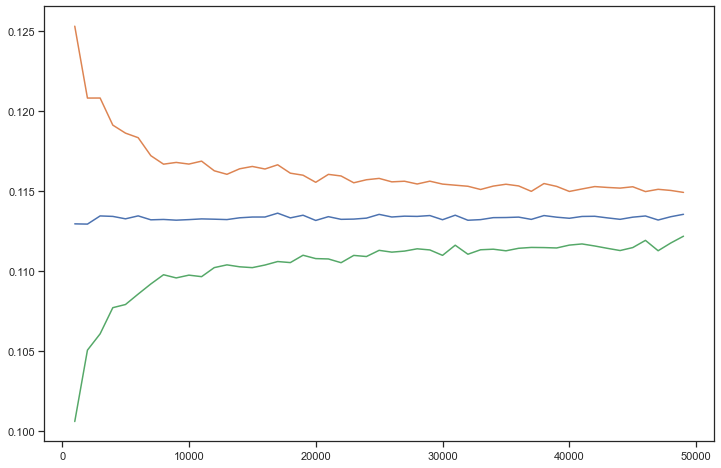

In [23]:
pylab.figure(figsize = (12,8))
tabel = np.array([means,confidenceIntervalUpper,confidenceIntervalLower]).T
pylab.plot(pathScenario, tabel)
pylab.title(u'期权计算蒙特卡洛模拟', fontproperties = font, fontsize = 18)
pylab.legend([u'均值', u'95%置信区间上界', u'95%置信区间下界'], prop = font)
pylab.ylabel(u'价格', fontproperties = font, fontsize = 15)
pylab.xlabel(u'模拟次数', fontproperties = font, fontsize = 15)
pylab.grid(True)

In [25]:
# 目标函数，目标价格由target确定
class cost_function:
    def __init__(self, target):
        self.targetValue = target

    def __call__(self, x):
        return call_option_pricer(spot, strike, maturity, r, x) - self.targetValue

# 假设我们使用vol初值作为目标
target = call_option_pricer(spot, strike, maturity, r, vol)
cost_sampel = cost_function(target)

# 使用Brent算法求解
from scipy import optimize
impliedVol = optimize.brenth(cost_sampel, 0.01, 0.5)

print (u'真实波动率： %.2f' % (vol*100,) + '%')
print (u'隐含波动率： %.2f' % (impliedVol*100,) + '%')

真实波动率： 25.00%
隐含波动率： 25.00%
